---
title: "DANL 210 - Unifying ESG Metrics with Financial Analysis"
author: Hayden Mikula
date: May 15, 2025
format:
  html
toc: True
---

In 2016, Morningstar released the first iteration of the Environmental, Social, and Governance (ESG) scores using data collected by Sustainalytic's ESG research efforts, with the intention to make insider information surrounding companies and investment risk much more accessible to the public. Today these ratings are largely standardized, being featured alongside company's financial information on prominent market data websites such as Yahoo Finance.

For these websites, the ESG ratings are indicators of an institution's risk relating to various sustainability metrics and general level of public controversy, and serve as general influences to consumer investment. In a survey conducted by Morningstar in September of 2024, 67% of asset owners believe that the ESG rating scheme has become more integral to their investment decisions.

With these ratings being presented alongside company-wise financial data such as historical stock price and income statements, the question arises: Just how effective is the ESG rating in predicting public investment decisions / outlooks?

Exploratory Questions:

- How concerned are companies with reducing their ESG risk?

- Which industries typically have the highest ESG risk assessments?

- Do ESG ratings affect stock prices?

### Library & File Setup

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url_2024 = "https://bcdanl.github.io/data/esg_proj_2024_data.csv"
esg_2024 = pd.read_csv(url_2024)
esg_2024 = esg_2024.rename({'Total_ESG':'total_esg'}, axis=1)

esg_2025 = pd.read_csv('/content/danl_210_mikula_hayden_esg.csv')
stocks = pd.read_csv('/content/danl_210_mikula_hayden_stock.csv')

### Data Sets

The data that this analysis uses is comprised of:

- The individual `Total ESG`, `Environmental`, `Social`, `Governance`, and `Controversy` ratings for 625 companies in 2024, along with the stock price financial data for these 625 companies from January 1st, 2024 - March 31st, 2025

- The individual `Total ESG`, `Environmental`, `Social`, `Governance`, and `Controversy` ratings for 3135 companies in 2025

  - All data was scraped from each company's **Historical Data** and **Sustainability** sections on Yahoo Finance respectively

#### ESG Data

In [ ]:
esg_2024

,Year,Symbol,Name,Sector,Industry,Country,Market_Cap,IPO_Year,total_esg,Environmental,Social,Governance,Controversy
0,2024,A,Agilent Technologies Inc. Common Stock,Industrials,Biotechnology: Laboratory Analytical Instruments,United States,40365434818,1999.0,13.6,1.1,6.4,6.1,2.0
1,2024,AA,Alcoa Corporation Common Stock,Industrials,Aluminum,United States,6622135551,2016.0,24.0,13.8,5.9,4.3,3.0
2,2024,AAL,American Airlines Group Inc. Common Stock,Consumer Discretionary,Air Freight/Delivery Services,United States,9088024606,NaN,26.4,9.9,11.6,4.8,2.0
3,2024,AAP,Advance Auto Parts Inc.,Consumer Discretionary,Auto & Home Supply Stores,United States,4474665296,NaN,11.5,0.1,8.3,3.1,2.0
4,2024,AAPL,Apple Inc. Common Stock,Technology,Computer Manufacturing,United States,2614310000000,1980.0,17.2,0.5,7.4,9.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,2024,XYL,Xylem Inc. Common Stock New,Industrials,Fluid Controls,United States,32010402681,2011.0,18.1,4.3,8.7,5.2,1.0
621,2024,YUM,Yum! Brands Inc.,Consumer Discretionary,Restaurants,United States,39885044416,NaN,20.1,4.5,11.4,4.1,2.0
622,2024,Z,Zillow Group Inc. Class C Capital Stock,Consumer Discretionary,Business Services,United States,10195469129,NaN,22.2,1.2,11.5,9.5,2.0
623,2024,ZBH,Zimmer Biomet Holdings Inc. Common Stock,Health Care,Industrial Specialties,United States,24476778026,NaN,26.0,3.6,14.5,7.9,2.0


In [ ]:
esg_2025

,Year,Symbol,Name,Sector,Industry,Country,Market_Cap,IPO_Year,total_esg,Environmental,Social,Governance,Controversy
0,2025,A,Agilent Technologies Inc. Common Stock,Industrials,Biotechnology: Laboratory Analytical Instruments,United States,3.391867e+10,1999.0,10.1,1.1,5.0,3.9,1.0
1,2025,AA,Alcoa Corporation Common Stock,Industrials,Aluminum,United States,8.279121e+09,2016.0,25.1,14.7,8.0,2.4,3.0
2,2025,AAL,American Airlines Group Inc. Common Stock,Consumer Discretionary,Air Freight/Delivery Services,United States,7.325392e+09,NaN,23.8,9.6,11.3,2.9,2.0
3,2025,AAMI,Acadian Asset Management Inc. Common Stock,Finance,Investment Managers,United Kingdom,9.987823e+08,2014.0,31.3,NaN,NaN,NaN,NaN
4,2025,AAON,AAON Inc. Common Stock,Industrials,Industrial Machinery/Components,United States,6.547366e+09,NaN,21.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2025,ZUMZ,Zumiez Inc. Common Stock,Consumer Discretionary,Clothing/Shoe/Accessory Stores,United States,2.929444e+08,2005.0,15.1,NaN,NaN,NaN,1.0
3131,2025,ZVIA,Zevia PBC Class A Common Stock,Consumer Staples,Beverages (Production/Distribution),United States,1.565735e+08,2021.0,32.9,NaN,NaN,NaN,NaN
3132,2025,ZVRA,Zevra Therapeutics Inc. Common Stock,Health Care,Biotechnology: Pharmaceutical Preparations,United States,4.307623e+08,NaN,34.6,NaN,NaN,NaN,NaN
3133,2025,ZWS,Zurn Elkay Water Solutions Corporation Common ...,Industrials,Industrial Machinery/Components,United States,5.741099e+09,2012.0,14.3,8.3,2.8,3.3,NaN


#### Stock Data

In [ ]:
stocks

,Symbol,Name,Date,Open,High,Low,Close,Adj. Close,Volume,Dividend
0,A,Agilent Technologies Inc. Common Stock,2025-03-28,119.21,119.66,116.36,116.69,116.44,1772900.0,NaN
1,A,Agilent Technologies Inc. Common Stock,2025-03-27,120.00,120.33,118.73,118.97,118.72,2075700.0,NaN
2,A,Agilent Technologies Inc. Common Stock,2025-03-26,120.72,121.14,119.05,119.90,119.65,2652900.0,NaN
3,A,Agilent Technologies Inc. Common Stock,2025-03-25,122.60,123.04,119.76,120.51,120.25,1605900.0,NaN
4,A,Agilent Technologies Inc. Common Stock,2025-03-24,121.88,124.43,120.89,121.97,121.71,1557400.0,NaN
...,...,...,...,...,...,...,...,...,...,...
194370,ZTS,Zoetis Inc. Class A Common Stock,2024-01-08,194.53,196.28,192.67,196.15,192.99,1610600.0,NaN
194371,ZTS,Zoetis Inc. Class A Common Stock,2024-01-05,193.07,195.94,193.07,194.85,191.71,1088200.0,NaN
194372,ZTS,Zoetis Inc. Class A Common Stock,2024-01-04,192.85,194.93,192.01,194.04,190.91,1851900.0,NaN
194373,ZTS,Zoetis Inc. Class A Common Stock,2024-01-03,195.92,195.95,192.80,192.93,189.82,1493000.0,NaN


### Data Exploration

#### How concerned are companies with reducing their ESG risk?

To begin, let's compare the distribution of `Total ESG` ratings from the common companies between the two available ESG-related data frames, along with being split by `Year`:

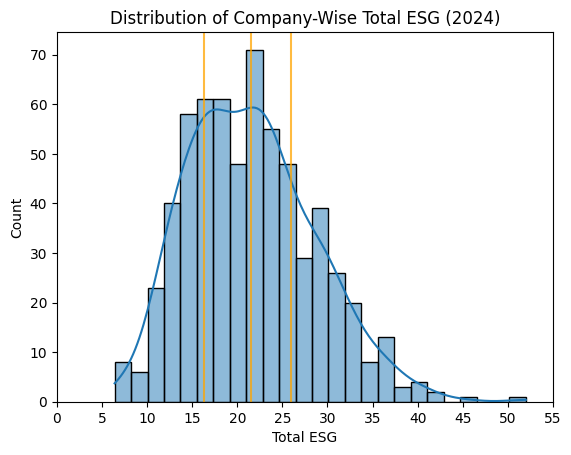

In [ ]:
(
    sns.histplot(data=esg_2024, x = 'total_esg', kde = True, bins = 25)
    .set(xlabel="Total ESG", ylabel="Count", title="Distribution of Company-Wise Total ESG (2024)")
)

for l in [esg_2024['total_esg'].quantile(0.25), esg_2024['total_esg'].mean() , esg_2024['total_esg'].quantile(0.75)]:
  plt.axvline(x = l, alpha = 0.75, color = 'orange')

plt.xticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55])

plt.show()

In [ ]:
esg_common_2025 = esg_2025[esg_2025['Symbol'].isin(esg_2024['Symbol'])].reset_index()

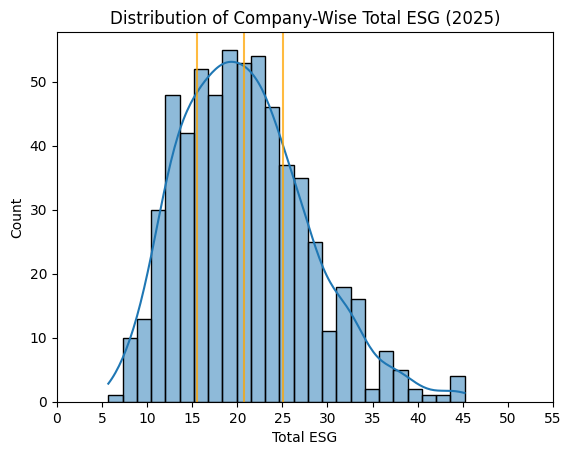

In [ ]:
(
    sns.histplot(data=esg_common_2025, x = 'total_esg', kde = True, bins = 25)
    .set(xlabel="Total ESG", ylabel="Count", title="Distribution of Company-Wise Total ESG (2025)")
)

for l in [esg_common_2025['total_esg'].quantile(0.25), esg_common_2025['total_esg'].mean() , esg_common_2025['total_esg'].quantile(0.75)]:
  plt.axvline(x = l, alpha = 0.75, color = 'orange')

plt.xticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55])

plt.show()

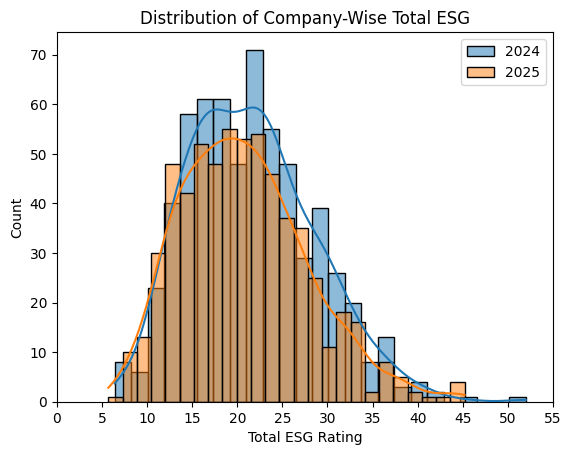

In [151]:
sns.histplot(data = esg_2024[~esg_2024['total_esg'].isna()], x = 'total_esg', kde=True, label = '2024', bins = 25),
sns.histplot(data = esg_common_2025[~esg_common_2025['total_esg'].isna()], x = 'total_esg', kde=True, label = '2025', bins = 25)

plt.title("Distribution of Company-Wise Total ESG")
plt.xlabel("Total ESG Rating")
plt.ylabel("Count")

plt.xticks(ticks=[0,5,10,15,20,25,30,35,40,45,50,55])

plt.legend()

plt.show()

From this, it can be observed that there hasn't been a total ESG shift in favor of a higher/lower average. However, from 2024 to 2025 the distribution of ESG ratings has normalized slightly, dispersing the higher concentration of values surrounding the mean in 2024 more towards the ends of the distribution that reflects movement towards a lower risk overall, though it isn't significant.

To get a better idea of what caused this dispersion, let's look at the distributions of the individual parts that make up the `Total ESG` rating:

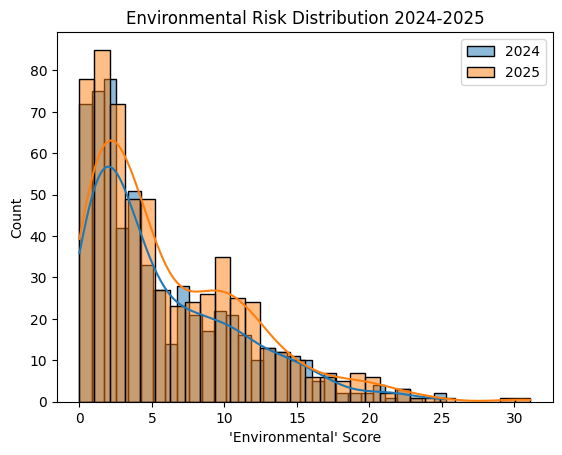

In [154]:
sns.histplot(data = esg_2024[~esg_2024['Environmental'].isna()], x = 'Environmental', kde=True, label = '2024', bins = 30),
sns.histplot(data = esg_common_2025[~esg_common_2025['Environmental'].isna()], x = 'Environmental', kde=True, label = '2025', bins = 30)

plt.title("Environmental Risk Distribution 2024-2025")
plt.xlabel("'Environmental' Score")
plt.ylabel("Count")

plt.legend()

plt.show()

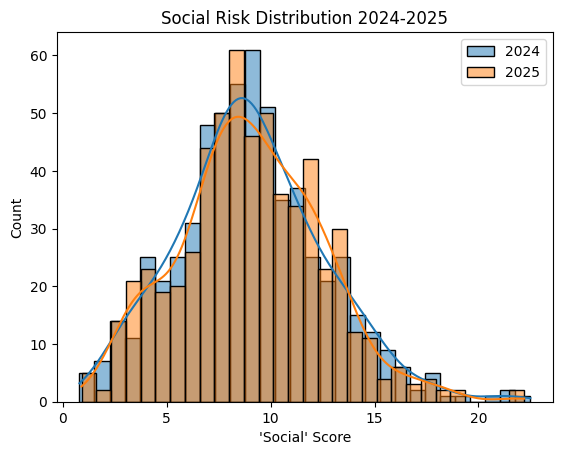

In [155]:
sns.histplot(data = esg_2024[~esg_2024['Social'].isna()], x = 'Social', kde=True, label = '2024', bins = 30),
sns.histplot(data = esg_common_2025[~esg_common_2025['Social'].isna()], x = 'Social', kde=True, label = '2025', bins = 30)

plt.title("Social Risk Distribution 2024-2025")
plt.xlabel("'Social' Score")
plt.ylabel("Count")

plt.legend()

plt.show()

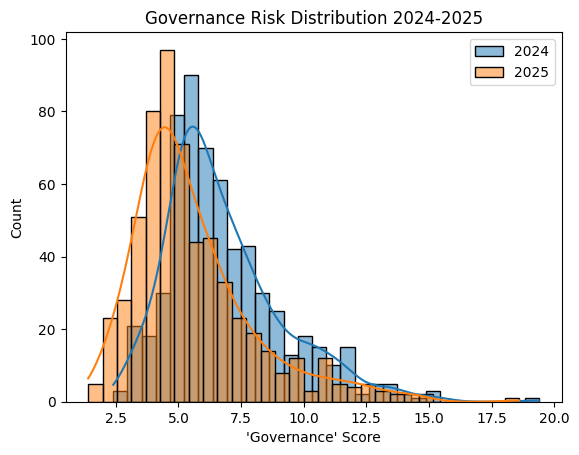

In [156]:
sns.histplot(data = esg_2024[~esg_2024['Governance'].isna()], x = 'Governance', kde=True, label = '2024', bins = 30),
sns.histplot(data = esg_common_2025[~esg_common_2025['Governance'].isna()], x = 'Governance', kde=True, label = '2025', bins = 30)

plt.title("Governance Risk Distribution 2024-2025")
plt.xlabel("'Governance' Score")
plt.ylabel("Count")

plt.legend()

plt.show()

`Governance` is the most adjusted attribute, with there being a real shift in the distribution itself by ~1.25 points in favor of a lower risk, rather than the values being merely redistributed. This tells us that companies have generally been making efforts to refine/redefine their structures, public transparency, and/or stockholder rights.

This is likely due to the 2024 amendment to the ESG by Morningstar to incorporate issues relating to material usage (such as water or raw materials) as a contributor to a lacking corporate governance structure, urging companies to find ways to limit material waste in addition to its existing effect in reducing `Environmental` risk as well.

Looking at the `Environmental` distribution, though, we see that this combined effect isn't received in the same way, with the amount of companies within the low/medium ranks increasing rather than the average decreasing in the same way as `Governance` did.

One explanation for this could be that there was a reallocation of weights for waste management between the two ratings when the 2024 update occurred, causing the `Environmental` rating to increase while not being a drastic change as a result of waste management already being a factor, albeit possibly weighted less heavily. For `Governance`, the waste management parameter was a new addition, so the change would have ended up being more fundamental.

#### Which Sectors / Industries Typically have the Highest ESG Ratings?

In [ ]:
# which industries typically have the highest ESG ratings?

mean_esg_2025 = (
    esg_2025
    .groupby(['Sector', 'Industry'])
    .agg(esg_mean = ('total_esg', 'mean'),
         esg_std = ('total_esg', 'std'))
    .dropna()
    .reset_index()
)

mean_esg_2025.sort_values('esg_mean', ascending=False)

,Sector,Industry,esg_mean,esg_std
65,Energy,Coal Mining,51.025000,8.421698
115,Industrials,Farming/Seeds/Milling,40.575000,6.584515
1,Basic Materials,Metal Mining,39.956250,9.653046
68,Energy,Integrated oil Companies,39.407143,7.042996
70,Energy,Oil & Gas Production,39.156250,11.617241
...,...,...,...,...
12,Consumer Discretionary,Books,13.550000,2.050610
36,Consumer Discretionary,Motor Vehicles,13.425000,2.227667
38,Consumer Discretionary,Newspapers/Magazines,12.600000,2.501999
46,Consumer Discretionary,Publishing,12.100000,4.667333


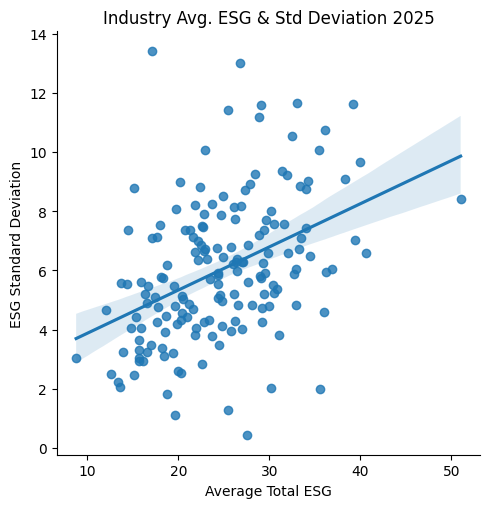

In [ ]:
# Relationship between mean esg and mean esg std deviation; higher mean = higher variance

sns.lmplot(data = mean_esg_2025, x = 'esg_mean', y = 'esg_std')

plt.title("Industry Avg. ESG & Std Deviation 2025")
plt.xlabel("Average Total ESG")
plt.ylabel("ESG Standard Deviation")

plt.show()

The prevailing observation here is that there is a strong positive correlation between average ESG and standard deviation. This implies that as ESG ratings become larger, the range between ratings becomes wider in turn, additionally showing that higher ratings among industry peers are less likely to stick as the norm.

More industries/companies are coming to the consensus that a lower ESG score is in their best interests, but is this a financial interest or a public relations interest?

#### Do ESG Scores Affect Stock Price?

To attempt to answer this question, a possible method could be to plot the relationship between a company's change in ESG rating and its average stock price. However, this could cause outliers during visualization, beacuse some stocks are valued much higher than others. Instead, I decided to compare the difference in ESG to the average % change of the Adjusted Closing price of a company's stock, that way the change is more normalized.

Taking a small random sample from the companies with significant differences in ESG scores, we can start to narrow down the nature of this relationship.

In [159]:
def rand_sample(n, start, end, seed):
  random.seed(seed)
  return random.sample(range(start, end), n)


# Example

rand_sample(15, 100, 300, 10)
  # A sample of 15 numbers from 100-300, with a set seed of '10'

[246, 108, 209, 223, 247, 103, 152, 218, 225, 171, 267, 141, 233, 183, 119]

In [160]:
esg_diff = pd.DataFrame()
esg_diff['Symbol'] = esg_2024['Symbol']
esg_diff['Difference'] = esg_common_2025['total_esg'] - esg_2024['total_esg']

seed = 100

esg_diff_pos = (
    esg_diff
    .query("Difference > 1 & Difference < 2")
    .reset_index(drop=True)
    .loc[rand_sample(20, 0, esg_diff.query("Difference > 1 & Difference < 2").shape[0]-1, seed)]
    .reset_index(drop=True)
)

esg_diff_neg = (
    esg_diff
    .query("Difference < -1 & Difference > -2")
    .reset_index(drop=True)
    .loc[rand_sample(20, 0, esg_diff.query("Difference < -1 & Difference > -2").shape[0]-1, seed)]
    .reset_index(drop=True)
)

In [161]:
stocks['adj_pct_change'] = (
    stocks.groupby('Symbol')['Adj. Close']
    .transform(lambda x: (x.shift(-1) - x) / x * 100)
    .shift(1)
)

stocks[['Name', 'Adj. Close', 'adj_pct_change']]

,Name,Adj. Close,adj_pct_change
0,Agilent Technologies Inc. Common Stock,116.44,NaN
1,Agilent Technologies Inc. Common Stock,118.72,1.958090
2,Agilent Technologies Inc. Common Stock,119.65,0.783356
3,Agilent Technologies Inc. Common Stock,120.25,0.501463
4,Agilent Technologies Inc. Common Stock,121.71,1.214137
...,...,...,...
194370,Zoetis Inc. Class A Common Stock,192.99,0.108932
194371,Zoetis Inc. Class A Common Stock,191.71,-0.663247
194372,Zoetis Inc. Class A Common Stock,190.91,-0.417297
194373,Zoetis Inc. Class A Common Stock,189.82,-0.570950


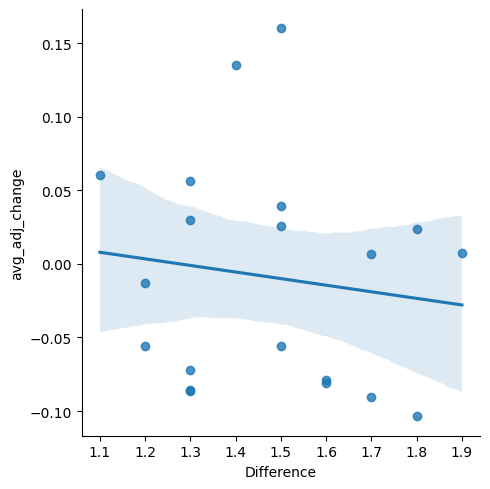

In [162]:
esg_diff_pos['avg_adj_change'] = (
    stocks[stocks['Symbol'].isin(esg_diff_pos['Symbol'])]
    .groupby('Symbol')['adj_pct_change']
    .agg('mean')
    .reset_index(drop=True)
)

sns.lmplot(data = esg_diff_pos, x = 'Difference', y = 'avg_adj_change')

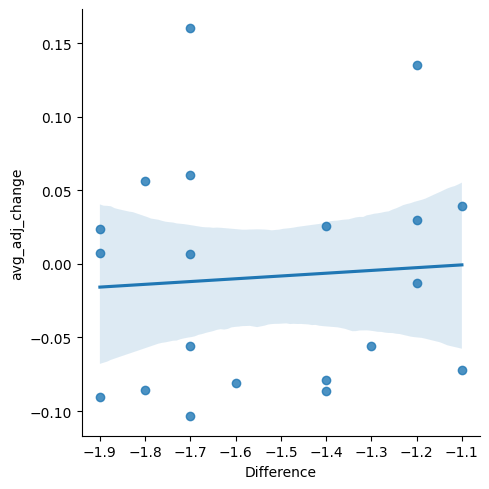

In [163]:
esg_diff_neg['avg_adj_change'] = (
    stocks[stocks['Symbol'].isin(esg_diff_pos['Symbol'])]
    .groupby('Symbol')['adj_pct_change']
    .agg('mean')
    .reset_index(drop=True)
)

sns.lmplot(data = esg_diff_neg, x = 'Difference', y = 'avg_adj_change')

It appears that there is a trend with there being a large degree of uncertainty for both visualization's best fit line, which is indicative of there not being a clear relationship between changes in ESG rating and changes in adjusted closing stock price. The two plots reflect two completely different relationships, one where an increase in ESG correlates to negative changes to stock price, and one where an increase in ESG correlates to a more positive change.

Even with a combination of these data points, the lack of a definitive relationship is clear, indicated by the near horizontal regression line:

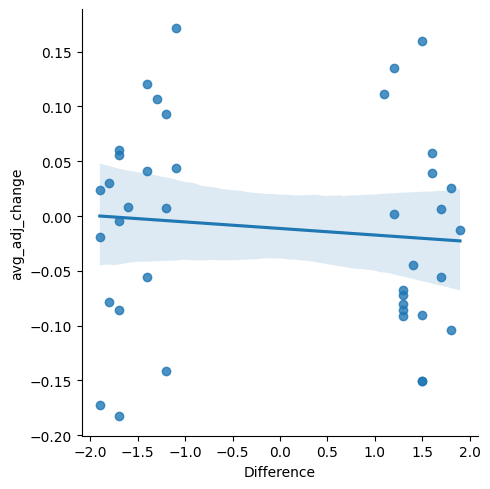

In [164]:
esg_diff_comb = pd.concat([esg_diff_pos, esg_diff_neg]).reset_index(drop=True)
esg_diff_comb['avg_adj_change'] = (
    stocks[stocks['Symbol'].isin(esg_diff_comb['Symbol'])]
    .groupby('Symbol')['adj_pct_change']
    .agg('mean')
    .reset_index(drop=True)
)

sns.lmplot(data = esg_diff_comb, x = 'Difference', y = 'avg_adj_change')

In [165]:
print("Despite this,", esg_diff.query("Difference < 0")['Difference'].shape[0] / esg_diff['Difference'].shape[0] * 100
, "percent of ESG ratings have lowered between 2024 and 2025.")

Despite this, 63.2 percent of ESG ratings have lowered between 2024 and 2025.


### Conclusion

In conclusion, although ESG score metrics impact the public outlook of a company, and are not uncommonly considered during consumer investment decisions, they doesn't seem to retain much usefulness when it comes to a company's financial gain/loss from stocks.

A company's incentive to decrease their ESG rating likely comes from either the desire to be looked upon favorably in comparison to their peers or from the pressures of having a standardized metric of sustainability that they could possibly be held accountable for. Regardless of the lack of a clear relationship, companies are vying for lower ESG ratings as time goes on, improving their corporate structures and endeavoring to make environmentally sustainable decisions, the importance of which cannot be understated.

Works Cited:

- “About Us.” Morningstar, Inc., [morningstar.com/company/about-us](https://www.morningstar.com/company/about-us). Accessed 14 May 2025.

- Kuh, Thomas. “Voice of the Asset Owner Survey 2024 Quantitative Analysis.” Morningstar Indexes, 23 Sept. 2024, [indexes.morningstar.com/insights/analysis/blt435a08d683d95490/voice-of-the-asset-owner-survey-2024-quantitative-analysis](https://indexes.morningstar.com/insights/analysis/blt435a08d683d95490/voice-of-the-asset-owner-survey-2024-quantitative-analysis). Accessed 14 May 2025.

- “Morningstar Sustainalytics Introduces Significant Enhancements to Its ESG Risk Ratings.” Sustainalytics.Com, 12 June 2024, [sustainalytics.com/esg-news/news-details/2024/06/12/morningstar-indexes-introduces-morningstar-sustainalytics-introduces-significant-enhancements-to-its-esg-risk-ratings#](https://www.sustainalytics.com/esg-news/news-details/2024/06/12/morningstar-indexes-introduces-morningstar-sustainalytics-introduces-significant-enhancements-to-its-esg-risk-ratings#:~:text=Upgrade%20to%20corporate%20governance%20methodology%20and%20strengthening,since%20industry%2Dleading%20ratings%20were%20introduced%20in%202018.&text=Sustainalytics%20will%20also%20strengthen%20its%20material%20ESG,which%20underpin%20the%20ESG%20risk%20ratings%20methodology).

- Yahoo! Finance, Yahoo!, [finance.yahoo.com/](https://finance.yahoo.com/). Accessed 14 May 2025.